Hello Matthew!

My name is Dmitry.  I'm glad to review your work today.
I will mark your mistakes and give you some hints how it is possible to fix them. We are getting ready for real job, where your team leader/senior colleague will do exactly the same. Don't worry and study with pleasure! 

Below you will find my comments - **please do not move, modify or delete them**.

You can find my comments in green, yellow or red boxes like this:

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Success. Everything is done succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Remarks. Some recommendations.
</div>

<div class="alert alert-block alert-danger">

<b>Reviewer's comment</b> <a class="tocSkip"></a>

Needs fixing. The block requires some corrections. Work can't be accepted with the red comments.
</div>

You can answer me by using this:

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Text here.
</div>

# Analysis of Ice Online video game Sales

Analysing data for Ice online stores, we will be looking into trends with video games and platforms to help predict better for the upcoming year of 2017.

We will be breaking down the analysis to find common trends, looking at several variables such as platform, genre, and relevant years and duration of platform relevance. In addition to these overarching trends, we will compare data pertaining to different regions of sales and what may be more popular in different locations.

#### Import Libraries

In [1]:
# Importing libraries for preprocessing and analysis
import pandas as pd #importing the pandas library
from matplotlib import pyplot as plt #importing Matplotlib's pyplot library
import numpy as np #importing the numpy library
from math import factorial #importing factorial for math library
from scipy import stats as st #importing stats from scipy

#### Import Data

In [2]:
# Import dataset
df = pd.read_csv('/datasets/games.csv')

#### Overview of Data

In [3]:
df.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


### Preprocessing and Enrichment of Data

- Replace the column names (make them lowercase).
- Convert the data to the required types.
- Describe the columns where the data types have been changed and why.
- If necessary, decide how to deal with missing values:
 - Explain why you filled in the missing values as you did or why you decided to leave them blank.
 - Why do you think the values are missing? Give possible reasons.
 - Pay attention to the abbreviation TBD (to be determined). Specify how you intend to handle such cases.
- Calculate the total sales (the sum of sales in all regions) for each game and put these values in a separate column.

In [5]:
df.columns= df.columns.str.lower() # Making column names lowercase
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [6]:
# Check for duplicates
df.duplicated().sum()

0

There are no duplicate rows.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Great start!
</div>

#### Name

In [7]:
df[df['name'].isna()] # Display rows with missing values

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Due to a lack of information provided in the displayed rows, they will be dropped as they are relatively insignificant.

In [8]:
df = df.dropna(subset=['name']) # Removing rows with missing values

In [9]:
df['name'].isna().sum() # Verifying no more missing rows

0

In [10]:
df.query("name == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done.
</div>

#### Platform

In [11]:
df['platform'].isna().sum() # Get a count of missing values

0

There are no missing values in the `platform` column.

In [12]:
df['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

There are no duplicate platforms with different syntax to be unified.

In [13]:
df.query("platform == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Year of Release

In [14]:
# Check for missing values
# Determine how to fill missing values and do so
# Verify no more missing Values

In [15]:
df['year_of_release'].isna().sum() # Get a count of missing values

269

In [16]:
df = df.dropna(subset=['year_of_release']) # Removing existing rows with missing values

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Our recommendation here to fill NaNs with dummy value or just remove these rows.
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Adjusted it to just remove the missing values. This could take care of a half-year issue I was running into later on which required redundant code. I'll make a note where that was because there was a question raised.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [17]:
df['year_of_release'].isna().sum() # Get a count of missing values

0

No more missing values in `year_of_release` after filling the years based on existing games and removing the remaining 146 rows. The final 146 rows were removed rather than filling with missing values based on the platform because of the spike in representation for certain years that would have occured. The data will be less skewed not factoring in said rows with this method, and the number of missing values compared to the total count is relatively small.

The reason for missing values in `year_of_realease` is possibly due to poor data entry, or the games could have release in multiple years on the same platform in different markets.

In [18]:
df.query("year_of_release == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Genre

In [19]:
# Check for missing values
# Determine how to fill missing values and do so
# Verify no more missing Values

In [20]:
df['genre'].isna().sum() # Get a count of missing values

0

There are no missing values in `genre`.

In [21]:
df['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

There are no duplicate genres with different syntax to be unified.

In [22]:
df.query("genre == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### North America Sales

In [23]:
df['na_sales'].isna().sum()

0

There are no missing values in `na_sales`.

In [24]:
df.query("na_sales == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Europe Sales

In [25]:
df['eu_sales'].isna().sum()

0

There are no missing values in `'eu_sales`.

In [26]:
df.query("eu_sales == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Japan Sales

In [27]:
df['jp_sales'].isna().sum()

0

There are no missing values in `jp_sales`.

In [28]:
df.query("jp_sales == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Other Sales

In [29]:
df['other_sales'].isna().sum()

0

There are no missing values in `other_sales`.

In [30]:
df.query("other_sales == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### Critic Scores

In [31]:
df['critic_score'].isna().sum()

8461

In [32]:
# Replacing the missing values with the median critic score value based on game name
df['critic_score'] = df['critic_score'].fillna(df.groupby(['name'])['critic_score'].transform('median'))

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You did a great job filling the gaps. But such a significant proportion of gaps can hardly be correctly restored from the available values.
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thanks! As for the other missing values - Later on when I was dealing with ratings in the Regional Analysis, I ended up filling the missing values with "Unrated". I could have shifted it up here, but opted not to. I will keep this situation in mind for other instances like it in the future.
</div>

In [33]:
df['critic_score'].isna().sum()

7522

For those games that were on multiple platforms, with some missing critic scores; the median critic score from those defined with the same name were applied to those with missing critic score.

We will let the rest remain as removing the rows with existing missing values would be detrimental to the overall data because of the quantity of them. Replacing them with an arbitrary value may also skew the data to a large degree making any analysis of critic scores virtually meaningless.

Missing values in `critic_scores` are likely due to some games not getting rated by critics or poor data reporting/entry.

In [34]:
df.query("critic_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


#### User Scores

In [35]:
df['user_score'].isna().sum()

6605

In [36]:
df.query("user_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.0,0.66,42.0,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.0,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.0,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.0,0.20,71.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.0,0.18,NaN,tbd,E
...,...,...,...,...,...,...,...,...,...,...,...
16695,Planet Monsters,GBA,2001.0,Action,0.01,0.00,0.0,0.00,67.0,tbd,E
16697,Bust-A-Move 3000,GC,2003.0,Puzzle,0.01,0.00,0.0,0.00,53.0,tbd,E
16698,Mega Brain Boost,DS,2008.0,Puzzle,0.01,0.00,0.0,0.00,48.0,tbd,E
16704,Plushees,DS,2008.0,Simulation,0.01,0.00,0.0,0.00,NaN,tbd,E


In [37]:
df['user_score'] = df['user_score'].where(df['user_score'] != 'tbd', None)

In [38]:
df.query("user_score == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


In [39]:
# Replacing the missing values with the median user score value based on game name
df['critic_score'] = df['critic_score'].fillna(df.groupby(['name'])['critic_score'].transform('median'))

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

You did a great job filling the gaps. But such a significant proportion of gaps can hardly be correctly restored from the available values.
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Same thing as above. I ended up assigning the "Unrated" term to the missing values in the ratings later on when it was necessary, but I'll keep this in mind for the future.
</div>

In [40]:
df['user_score'].isna().sum()

8981

For those games that had `tbd` as their value in `user_score` - the `tbd` values was replaced with missing values as that is what they represent. Those missing values were then processed in a uniform fashion.

For those games that were on multiple platforms, with some missing user scores; the median user score from those defined with the same name were applied to those with missing user score. However, there were no repeat titles that had partial missing user scores - so this method did not yield any benefit.

We will let the rest remain as removing the rows with existing missing values would be detrimental to the overall data because of the quantity of them. Replacing them with an arbitrary value may also skew the data to a large degree making any analysis of user scores virtually meaningless.

Missing values in `user_scores` are possibly due to games not being rated (this could have been due to year of release or lack of attention), or due to poor reporting/data entry. For those that were initially `tbd` it is possible that they were games that had user scores being collected for them, but didn't meet a threshold to be reported or recorded.

#### Rating

In [41]:
df['rating'].isna().sum()

6676

In [42]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

The missing values in `rating` will not be altered as some games were not rated due to the years in which they were released. Another possible reason for missing values is poor reporting/data entry.

In [43]:
df.query("rating == 'tbd'")

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: it's useful to check value_counts() for categorical columns. We can delete rare categories after such analysis.
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Thanks for the tip. I learned that "K-A" was an old term for "E" that was changed in 1998 when working with the ESRB ratings later on. In the future, I'll likely try to condense stuff like this down earlier on to simplify things.
</div>

#### Total Sales

In [44]:
# Add a column of total sales in its own column
total_sales = []

for index, row in df.iterrows():
    total = row['na_sales'] + row['eu_sales'] + row['jp_sales'] + row['other_sales']
    total_sales.append(total)

In [45]:
df['total_sales'] = total_sales
df = df[['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'total_sales', 'critic_score', 'user_score', 'rating']]

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Pro tip: we can perform column-wise sum.
    
df['total_sales'] = df['na_sales'] + df['eu_sales'] + df['jp_sales'] + df['other_sales']
</div>



<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I actually learned, or relearned of this later on when looking up some methods. In hindsight it would have been much easier than the loop I wrote.
</div>

#### Convert Data Types

In [46]:
# Convert data types for all appropriate columns to most streamline type
df.astype({'year_of_release':'int64'})

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,total_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,82.54,76.0,8,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,40.24,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,35.52,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,32.77,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,31.38,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,0.01,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,0.01,NaN,NaN,NaN


General pre-processing completed on the imported data.

### Exploratory Data Analysis

#### EDA - Games Released per Year ####

In [47]:
# Creating a condensed table for the graphic

da1 = df.groupby('year_of_release').count() # Getting a count of values by year
da1.reset_index(inplace=True)
da1 = da1.pivot_table(index='year_of_release',
                      values='name',
                      aggfunc='sum'
                     )
da1.reset_index(inplace=True)
da1['year_of_release'] = da1['year_of_release'].astype('int64') # Converting years to integers

<div class="alert alert-block alert-warning">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Does it make sense to round year_of_release after converting to int and then convert to int again?
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I had the exact same thought, but was getting half years, which was the need for the rounding. My guess it it was caused by assigning average years to some games based on those of the same name. Then I converted it to int data type to remove the .0 that was hanging out on the end of all the years for better appearance when graphed. I didn't like the look of 1980.0, 1981.0, etc. and this was the easiest way I thought to correct it (though I admit, there might be a metter method out there).
    
Since I changed the code relating to release years, I was able to eliminate the rounding and clean it up a bit.
</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done.
</div>

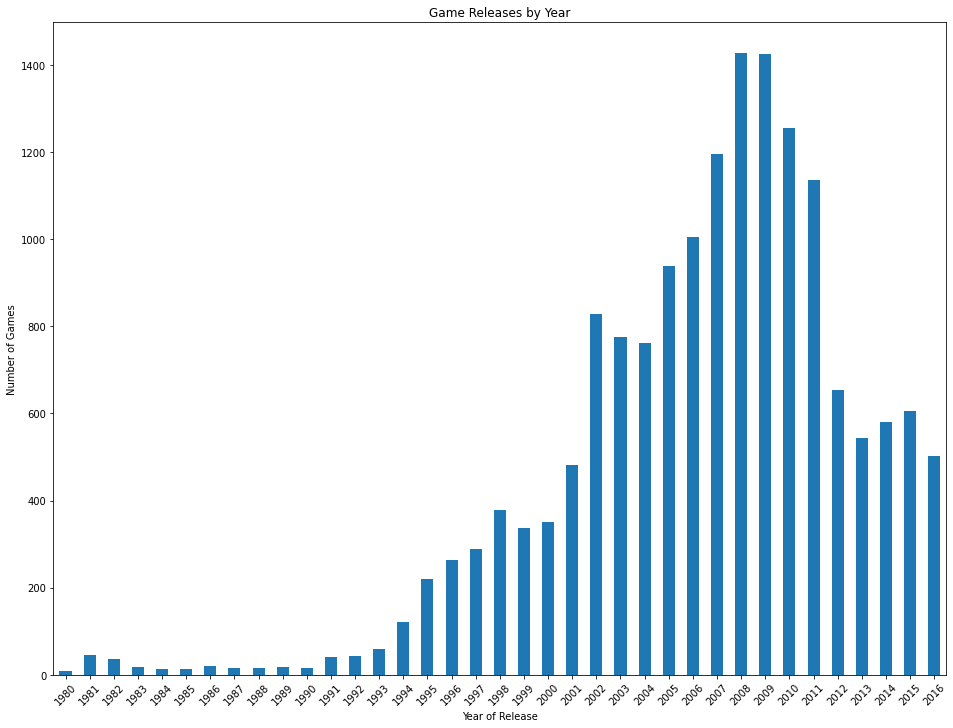

In [48]:
da1.plot(kind='bar',
         x='year_of_release',
         stacked=True,
         title='Game Releases by Year',
         xlabel='Year of Release',
         ylabel='Number of Games',
         figsize=[16,12],
         legend=False
        )

plt.xticks(rotation = 45)
plt.show()

According to the graphic, games started selling in 1980, with relatively few per year. It wasn't until the 1990s that the number of games published began increasing until peaking in 2008. After 2009 the number published dropped off until 2012 when the yearly numbers fluctuatated slightly around 550 between 2012 and 2016.

With the task of projecting popular trends for the year 2017, it is not necessary to take all the data into account as trends in popularity change in different periods. At most, back until 2000 is the earliest that would need to be taken into account, and at the lastest, 2012 when the games released began averaging around 550.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Nice graph and good conclusion!
</div>

#### EDA - Sales by Platform ####

In [49]:
# Creating a table of total sales by platform and sorting them high to low

da2a = df.pivot_table(index='platform',
                      values='total_sales',
                      aggfunc='sum'
                     )
da2a.reset_index(inplace=True)
da2a.sort_values(by='total_sales', ascending=False, inplace=True)
da2a

,platform,total_sales
16,PS2,1233.56
28,X360,961.24
17,PS3,931.34
26,Wii,891.18
4,DS,802.78
15,PS,727.58
18,PS4,314.14
6,GBA,312.88
19,PSP,289.53
2,3DS,257.81


Breakdown of selection for graphic

Threshold was top 10 platforms

In [50]:
# Creating condensed table for graphic

da2b = df.pivot_table(columns='platform',
                     index='year_of_release',
                     values='total_sales',
                     aggfunc='sum'
                    )

da2b.reset_index(inplace=True)
da2b['year_of_release'] = da2b['year_of_release'].round().astype('int64')
da2b = da2b[['year_of_release', 'PS2', 'X360', 'PS3', 'Wii', 'DS', 'PS', 'PS4', 'GBA', 'PSP', 'PC']] # Defining columns/platforms
da2b = da2b.drop([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], axis=0) # Trimming rows to remove the unnecessary ones
da2b = da2b.pivot_table(index='year_of_release',
                        aggfunc='sum'
                       ) # Removing duplicate years
da2b.reset_index(inplace=True)

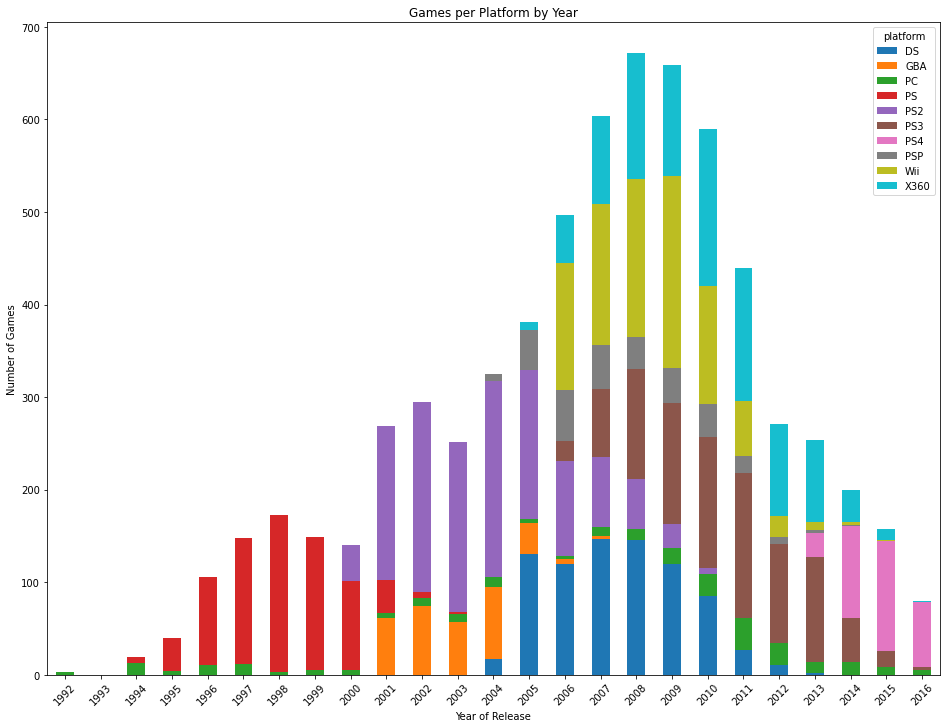

In [51]:
da2b.plot(kind='bar',
          x='year_of_release',
          stacked=True,
          title='Games per Platform by Year',
          xlabel='Year of Release',
          ylabel='Number of Games',
          figsize=[16,12],
          xlim=1990
         )

plt.xticks(rotation = 45)
plt.show()

Taking the top ten platforms based on total sales, starting in 1992, we can draw some conclusions on the typical trends and lifetime of platform relevance. With one exception, platforms tend to remain relevant for approximately eight years on average. Platforms generally have a year of fewer games being released, likely due to the platform being new, then in the last few years of relevance, the number of games slowly drops off, likely because game developers focus on newer platforms.

The one exception mentioned before is PC. Likely because of the ever evolving system with specifications and hardware improving with time, it never becaomes irrelivant. Though it represents a relatively small marketshare in number of games produced for it, it represents an everpresent market that can be tapped into by game designers and developers.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Perfect!
</div>

#### EDA - Finding Relevant Years ####

- Determine what period you should take data for. To do so, look at your answers to the previous questions. The data should allow you to build a prognosis for 2017.
- Work only with the data that you've decided is relevant. Disregard the data for previous years.

In [52]:
# Creating a dataframe of games published in 20004 and later
df_recent_years = df.copy()
df_recent_years = df_recent_years.query('year_of_release >= 2013')
df_recent_years['year_of_release'] = df_recent_years['year_of_release'].astype('int64') # Setting years to integer data type

Based on previous exploratory analysis, we can disregard data prior to 2004. 2004 is the year in which a number of relevant platforms, such the Nintendo DS and PlayStation Portable were released, and was the start of the increase of games released, which peaked in 2008. It is also a year or two before prevelant systems such as the Nintendo Wii, PlayStation 3, and XBox 360 entered the market.

Two narrowed dataframes have been created, the first going back no further than 2004, in order to see things such as the average life of a platform, and trends that multiple platforms take in becoming popular, then fading in prevelance. The second, dataframe is for the years of 2013 until 2016 and is a more narrowed set of data. This second data set will be the primary source for projecting for 2017 - it shows the most recent three years of the market, and leaves out older data that could be misleading as it displays previous trends and market data that may not be relevant.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

It is uncommon to use data for more than 2-3 years when forecasting next year's sales, even in case of traditional businesses. And in the dynamic computer games industry, taking longer time intervals should be avoided as it will definitely lead to tracking some obsolete trends. But you shouldn't take too short a period either.
</div>


<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I created a second dataframe for 2013 onwards to reflect the data set to project for 2017 from. I kept the previous 2004 onwards dataframe as well as there are some dependent code for it which along with conclusions got passing/green comments. If you would rather I switch all instances of df_recent_years in the following analyses, to df_2013_2016 and adjust conclusions to fit the condensed data, just let me know and I can do just that.

</div>

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

We need to perform further analysis only with recent data =)
    
Also, pay attention to this mix-up "df_2013_2016['year_of_release'] = df_recent_years['year_of_release'].astype('int64')".
    
And let's copy() dataframe to new one. This can help us to avoid warnings.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I removed the df_2013_2016 code and adjusted the df_recent_years to reflect for that period. Having but not using my previous df_recent_years set at a wider range was pointless since I'd be using the 20013-2016 time frame for those analyses.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

#### EDA - Finding Sales Trends by Platform ####

In [53]:
df_recent_years['platform'].unique()

array(['PS3', 'X360', 'PS4', '3DS', 'XOne', 'WiiU', 'Wii', 'PC', 'PSV',
       'DS', 'PSP'], dtype=object)

In [54]:
# Building a datafram of platform sales by years, using 1992 onward
da4 = df_recent_years.pivot_table(columns='platform',
                                  index='year_of_release',
                                  values='total_sales',
                                  aggfunc='sum'
                                 )
da4.reset_index(inplace=True)
da4 = da4.drop(['PSP'], axis=1)
da4

platform,year_of_release,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
0,2013,56.57,1.54,12.38,113.25,25.99,10.59,8.59,21.65,88.58,18.96
1,2014,43.76,NaN,13.28,47.76,100.00,11.90,3.75,22.03,34.74,54.07
2,2015,27.78,NaN,8.52,16.82,118.90,6.25,1.14,16.35,11.96,60.14
3,2016,15.14,NaN,5.25,3.60,69.25,4.25,0.18,4.60,1.52,26.15


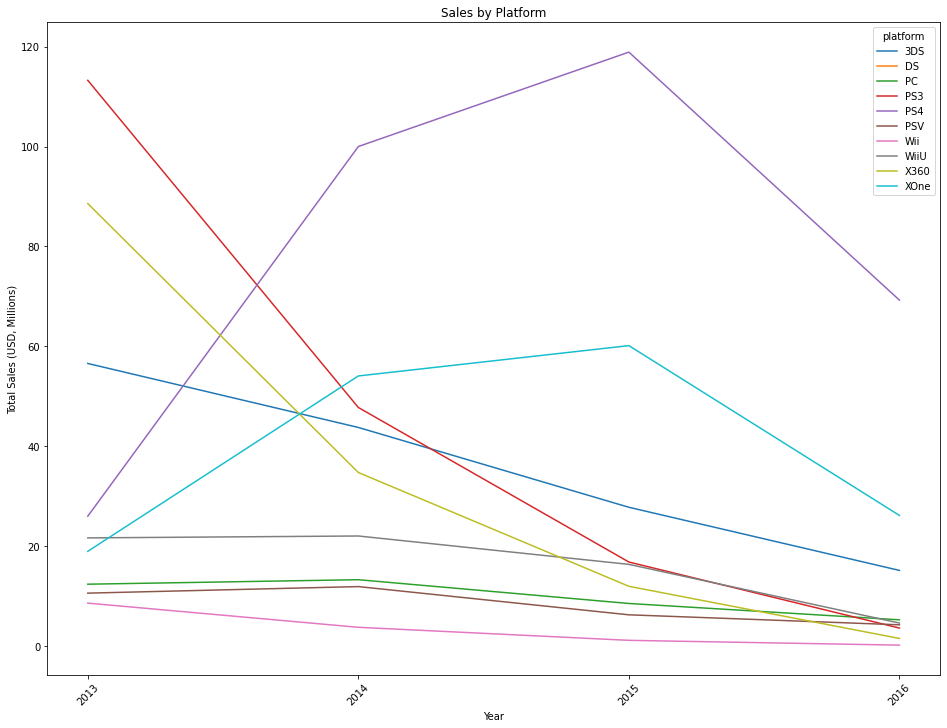

In [55]:
da4.plot(kind='line',
         x='year_of_release',
         title='Sales by Platform',
         xlabel='Year',
         ylabel='Total Sales (USD, Millions)',
         figsize=[16,12]
        )

plt.xticks([2013, 2014, 2015, 2016])
plt.xticks(rotation = 45)
plt.show()

Looking at 2016, all systems are on a downward trend, but based on the lifetime of average platform relevance, the two platforms that would be worthwile investment for game development would be the PlayStation 4 and XBox One which were both released in 2013, having their sales increase in 2014 when they are established fully, meaning they should expect relatively stable sales until 2018 at the earliest. A third platform worth investing in, though it does not represent a high market share is PC because of the stability it offers - there are rises and declines in the sales, but they maintain a relative constant low market share of sales.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have adjusted the code with df_recent_years changing an alterend the conclusion as necessary.

</div>

#### EDA - Sales Distribution by Platform ####

In [56]:
#Building dataframes for box plot and for average sales of games

da5a = df_recent_years.pivot_table(columns='platform',
                                  index='name',
                                  values='total_sales',
                                 )
da5a = da5a.drop(['PSP', 'Wii', 'DS'], axis=1)

da5b = df_recent_years.pivot_table(columns='platform',
                                   values='total_sales',
                                   aggfunc='mean'
                                   )

da5b = da5b.drop(['PSP', 'Wii', 'DS'], axis=1)

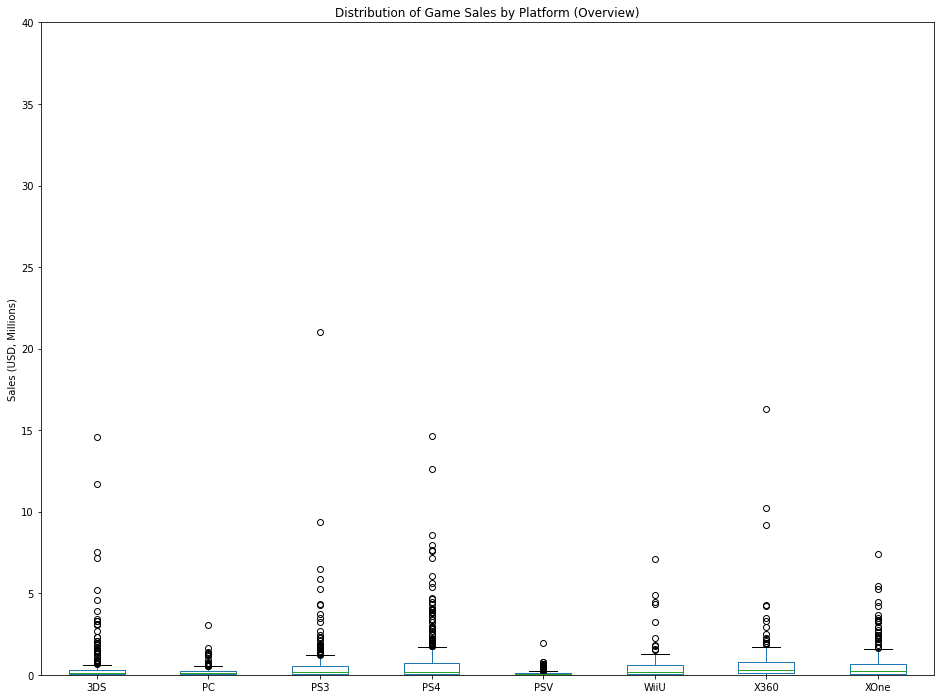

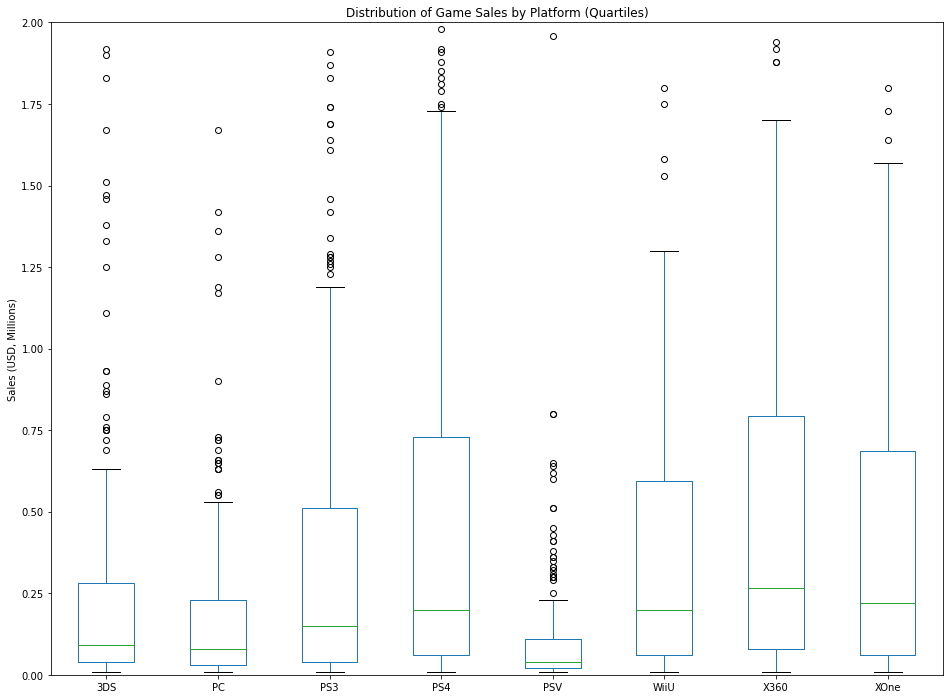

'Mean values by platform:'

platform,3DS,PC,PS3,PS4,PSV,WiiU,X360,XOne
total_sales,0.472772,0.208624,0.525884,0.801378,0.092151,0.562,0.735484,0.64502


In [57]:
da5a.plot(kind='box',
         figsize=[16,12],
         ylabel='Sales (USD, Millions)',
         title='Distribution of Game Sales by Platform (Overview)',
         ylim=[0,40]
        )
da5a.plot(kind='box',
         figsize=[16,12],
         ylabel='Sales (USD, Millions)',
         title='Distribution of Game Sales by Platform (Quartiles)',
         ylim=[0,2]
        )

plt.show()
display('Mean values by platform:', da5b)

There are three general categories for gaming platforms, stationary consoles such as the PlayStation 4 and Xbox One, portable systems such as the Nintendo 3DS, and PlayStation Vita, and PC, which is unique in that systems can be desktop or laptop, and have the potential to be updgraded as technology improves.

From the boxplots above, it can be concluded that the highest sales are associated with plaforms such as the PlayStation 4 and XBox 360 which are both stationary gaming systems - these systems also have a trend of outliers with higher sales showing that they have had a number of popular games to a greatest extent than other types of platforms.

There is a second general grouping, with respectable, albiet lower average sales. These are platforms such as the Nintendo 3DS and WiiU, which can be categorized as portable gaming systems. The three shown platforms in the box plot tend to have a lower mean in sales, and less profitable outliers, although the WiiU shows to have been unique in that it kept up with stationary platforms. This could be due to it being the newest Nintendo platform and as the Wii was not replaced with another stationary console on the market, the WiiU absorbed a lot of potential customers that were loyal to the Nintendo brand.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have adjusted the code with df_recent_years changing an alterend the conclusion as necessary.

</div>

#### EDA - Correlation of Reviews to Sales ####

In [58]:
# Creating a dataframe for only XBox 360 platform
df_360 = df.copy()
df_360 = df_360.query('platform == "X360"')
df_360['year_of_release'] = df_360['year_of_release'].astype('int64') # Setting years to integer data type
df_360['user_score'] = df_360['user_score'].astype('float') # Setting user score to float data type

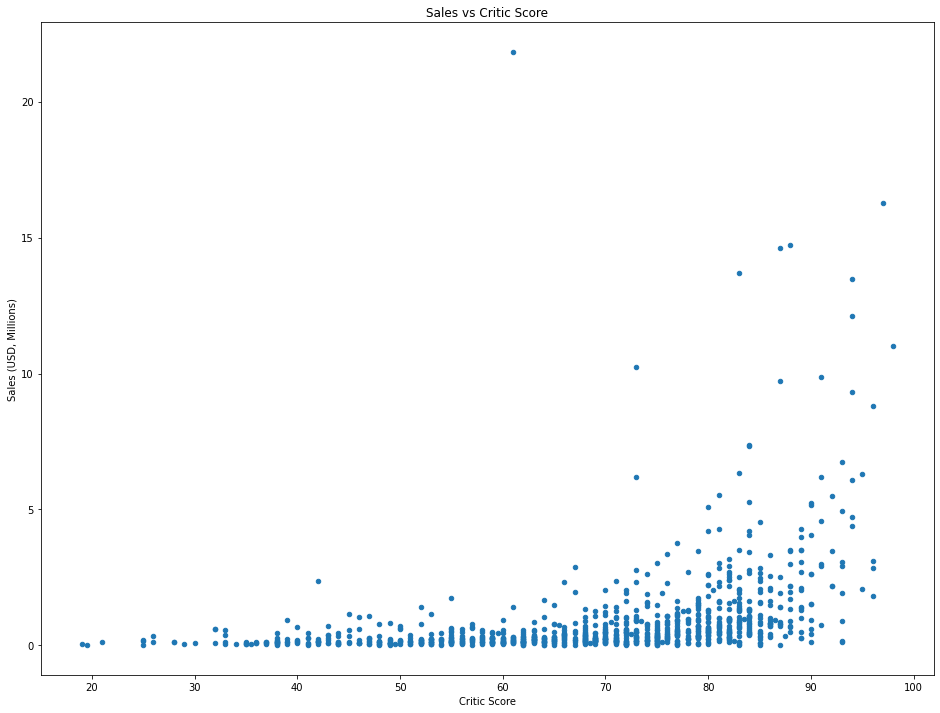

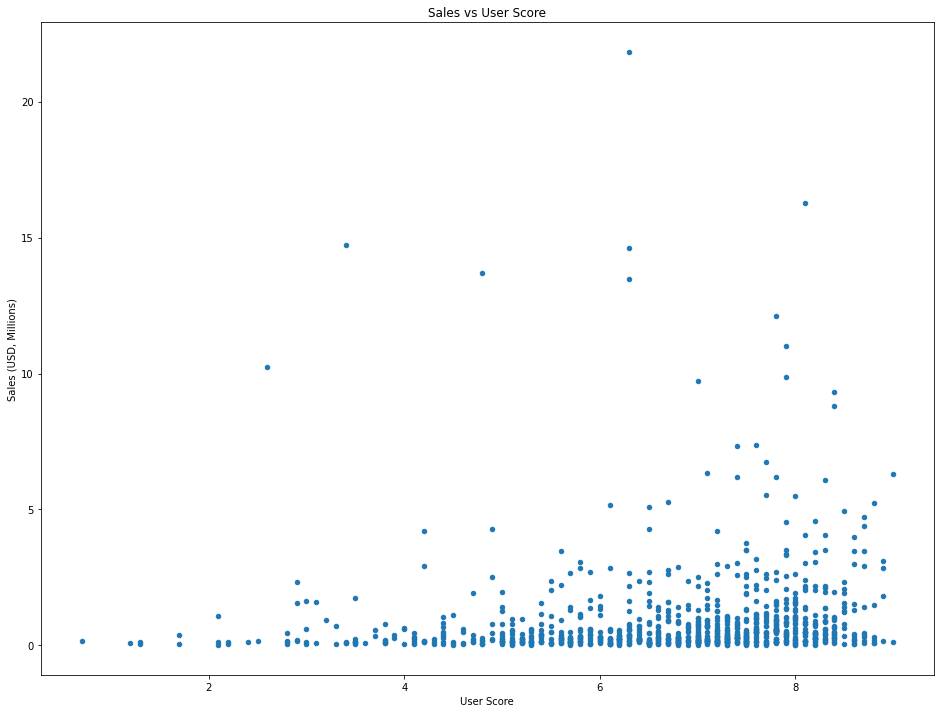

In [59]:
df_360.plot(kind='scatter',
           x='critic_score',
           y='total_sales',
           title='Sales vs Critic Score',
           xlabel='Critic Score',
           ylabel='Sales (USD, Millions)',
           figsize=[16,12]
           )

df_360.plot(kind='scatter',
           x='user_score',
           y='total_sales',
           title='Sales vs User Score',
           xlabel='User Score',
           ylabel='Sales (USD, Millions)',
           figsize=[16,12]
           )

plt.show()

In [60]:
display('Critic Score Correlation Coefficient =', df_360['total_sales'].corr(df_360['critic_score']))
display('User Score Correlation Coefficient =', df_360['total_sales'].corr(df_360['user_score']))

'Critic Score Correlation Coefficient ='

0.3782020388873743

'User Score Correlation Coefficient ='

0.11418661214018044

Critic scores can be seen to have a weak positive correlation with game sales. This is most reflected in higer rated games, as lower ones on average have relatively low scores. This is only reinforced by a Correlation Coefficient of 0.3771.

User scores don't have any real correlation with game sales, or any correlation that does exist is mor complex than simply comparing two metrics. This is reinforced by a Correlation Coefficient of 0.1137.

Based on these correlations, or lack there of, it can be concluded that many consumers pay little or no attention to both peer or professional ratings when choosing games to purchase and play. There are likely a number of factors that go into their decisions beyond ratings, such as the genre of the game, whether there is relation to other medias, single-player vs. cooperative vs. competive play, or a number of any other factors.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Good job.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I got rid of the error here as well using copy() as it was mentioned to do it above.

</div>

#### EDA - Multi-platform Games ####

In [61]:
da7_platforms = ['PC', 'PS3', 'PS4', 'X360', 'XOne'] # Creating a list of platforms to include

da7a = df_recent_years.query("platform == @da7_platforms") # Creating condensed dataframe

da7_names = ['FIFA 15',
             'NBA 2K16',
             'Middle-Earth: Shadow of Mordor',
             'Dragon Age: Inquisition',
             'Call of Duty: Advanced Warfare',
             'Need for Speed Rivals',
             'Battlefield 4',
             'Grand Theft Auto V',
             'Just Dance 2015',
             'Rocksmith 2014'
            ] # Selecting 10 games to compare

da7b = da7a.query("name == @da7_names")[['name', 'platform', 'total_sales']] # Creating dataframe of just the games being looked at

da7b = da7b.pivot_table(columns='platform',
                        index='name',
                        values='total_sales'
                       )
da7b.reset_index(inplace=True)

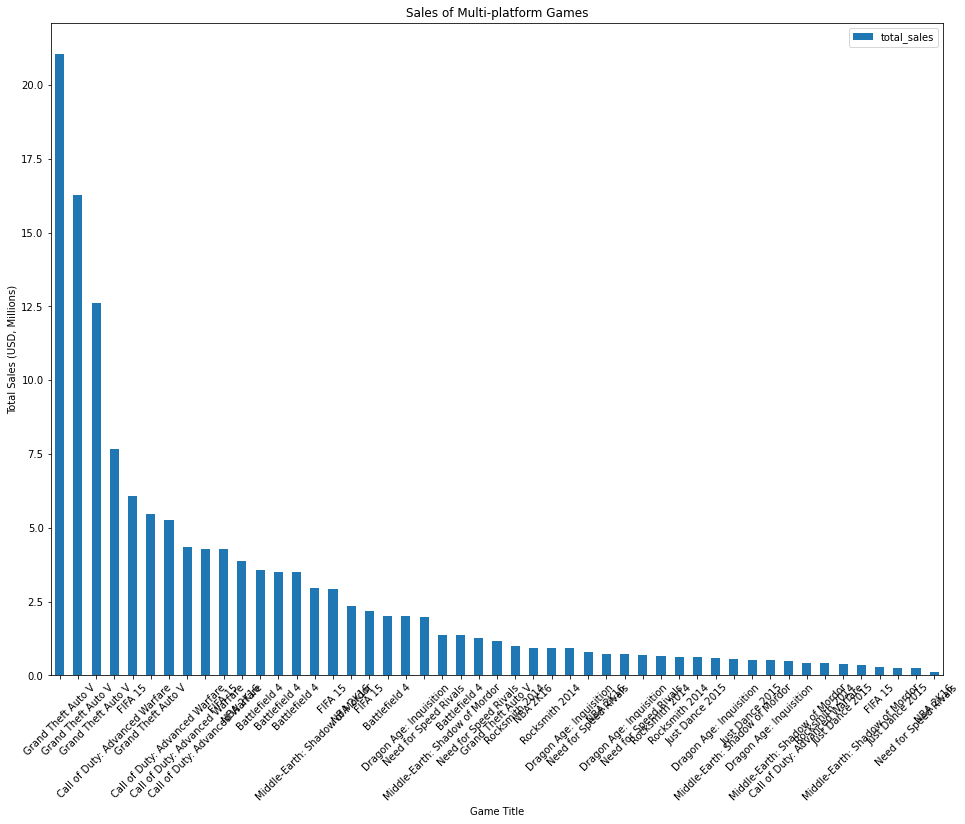

In [63]:
da7b.plot(kind='bar',
          x='name',
          title='Sales of Multi-platform Games',
          xlabel='Game Title',
          ylabel='Total Sales (USD, Millions)',
          figsize=[16,12]
         )

plt.xticks(rotation = 45)
plt.show()

When comparing a small sample of games that were released for multiple platforms, a relationship can be seen between game sales for the PlayStation 3 and XBox 360 - the two tend to be relatively close in sales. There appears to be a similar relationship between the PlayStation 4 and Xbox One, though the PlayStation 4 appears to have the edge on sales in almost every circumstance.

The PC platform also has relatively minimal hold of the market, and outside of one game, which shows no sales, there is at least some representation of market share. The platform looks to be less popular with the Sports genre coparitively to sales on other platforms as well.

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have adjusted the code with df_recent_years changing an alterend the conclusion as necessary.

</div>

#### EDA - Distribution of Game by Genre ####

In [64]:
da8a = df_recent_years.pivot_table(columns='genre',
                                  index='name',
                                  values='total_sales',
                                 )

da8b = df_recent_years.pivot_table(columns='genre',
                                   values='total_sales',
                                   aggfunc='mean'
                                   )

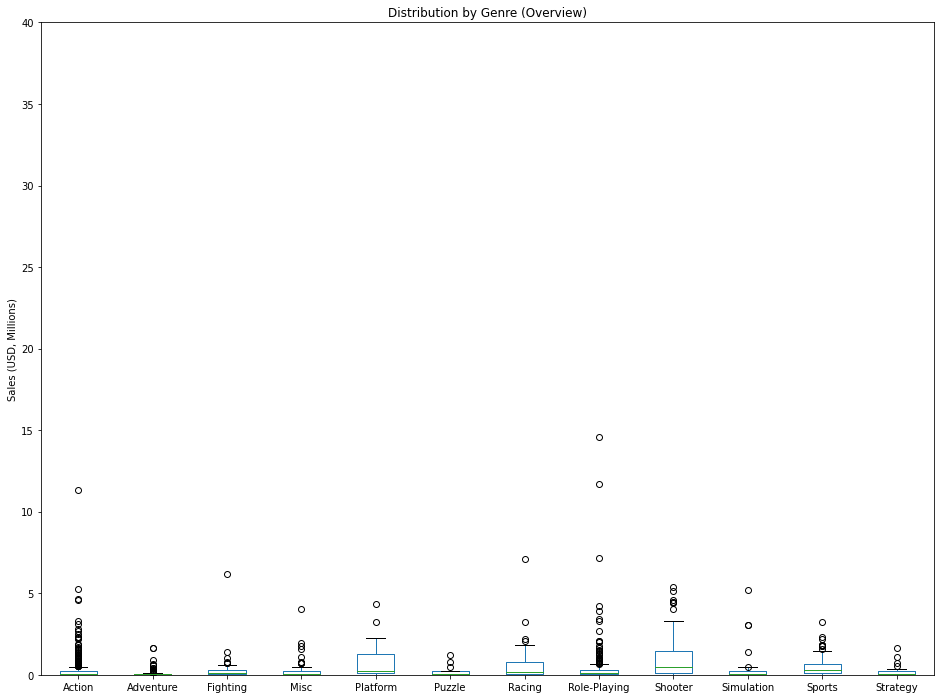

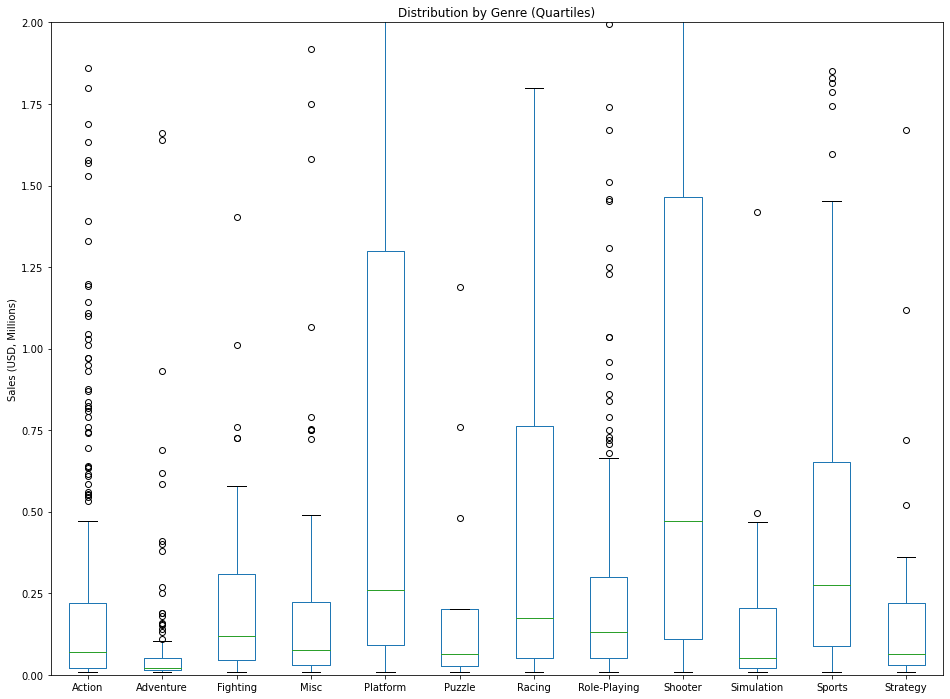

'Mean values by genre:'

genre,Action,Adventure,Fighting,Misc,Platform,Puzzle,Racing,Role-Playing,Shooter,Simulation,Sports,Strategy
total_sales,0.420196,0.09649,0.441375,0.40529,0.576081,0.186471,0.469294,0.499623,1.245882,0.350968,0.703972,0.18


In [65]:
da8a.plot(kind='box',
          figsize=[16,12],
          ylim=[0,40],
          title='Distribution by Genre (Overview)',
          xlabel='Genre',
          ylabel='Sales (USD, Millions)'
        )

da8a.plot(kind='box',
          figsize=[16,12],
          ylim=[0,2],
          title='Distribution by Genre (Quartiles)',
          xlabel='Genre',
          ylabel='Sales (USD, Millions)'
        )

plt.show()
display('Mean values by genre:', da8b)

*One outlier for Sports not shown - value of approximately 82 million USD.*

The highest selling, or most profitable genres are Shooter and Platform, while the least profitable genre is Adventure. This likely reflects the primary platforms on which games are released impacting overall sales. Genres such as Shooter and Platform are likely published for consoles such as one of the variations of XBox or PlayStation, while other genres like Strategy and Puzzle are targetted towards PC or even mobile gaming. Because of the greater overall popularity, as reflected in total sales, for stationary consoles, popular genres on such systems would be more profitable, where games released for PC and portable devices aren't as great a source of revenue.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I have adjusted the code with df_recent_years changing an alterend the conclusion as necessary.

</div>

### Regional Profiles

#### Top 5 platforms by Region ####

In [66]:
# Creating dataframe of total sales to show full market sales
ra1a = df.pivot_table(index='platform',
                      values='total_sales',
                      aggfunc='sum'
                     )
ra1a.reset_index(inplace=True)
ra1a = ra1a.sort_values(by='total_sales', axis=0, ascending=False)

In [67]:
# Creating a function to calculate market share
def market_share(df, column, list):
    for index, row in df.iterrows():
        share = (row[column] / row['total_sales'] * 100)
        list.append(share)

In [68]:
# Creating dataframe for top 5 NA platforms
ra1_na = df.pivot_table(index='platform',
                        values='na_sales',
                        aggfunc='sum'
                       )
ra1_na.reset_index(inplace=True)
ra1_na = ra1_na.sort_values(by='na_sales', axis=0, ascending=False)

# Incorporating total sales for market share comparison
ra1_na = ra1_na.merge(ra1a, on='platform', how='left')

na_share = []
market_share(ra1_na, 'na_sales', na_share)
ra1_na['market_share'] = na_share

In [69]:
# Creating dataframe for top 5 EU platforms
ra1_eu = df.pivot_table(index='platform',
                        values='eu_sales',
                        aggfunc='sum'
                       )
ra1_eu.reset_index(inplace=True)
ra1_eu = ra1_eu.sort_values(by='eu_sales', axis=0, ascending=False)

# Incorporating total sales for market share comparison
ra1_eu = ra1_eu.merge(ra1a, on='platform', how='left')

eu_share = []
market_share(ra1_eu, 'eu_sales', eu_share)
ra1_eu['market_share'] = eu_share

In [70]:
# Creating dataframe for top 5 JP platforms
ra1_jp = df.pivot_table(index='platform',
                        values='jp_sales',
                        aggfunc='sum'
                       )
ra1_jp.reset_index(inplace=True)
ra1_jp = ra1_jp.sort_values(by='jp_sales', axis=0, ascending=False)

# Incorporating total sales for market share comparison
ra1_jp = ra1_jp.merge(ra1a, on='platform', how='left')

jp_share = []
market_share(ra1_jp, 'jp_sales', jp_share)
ra1_jp['market_share'] = jp_share

In [71]:
display(ra1_na.head())
display(ra1_eu.head())
display(ra1_jp.head())

,platform,na_sales,total_sales,market_share
0,X360,595.74,961.24,61.976197
1,PS2,572.92,1233.56,46.444437
2,Wii,486.87,891.18,54.632061
3,PS3,390.13,931.34,41.889106
4,DS,380.31,802.78,47.374125


,platform,eu_sales,total_sales,market_share
0,PS2,332.63,1233.56,26.965044
1,PS3,327.21,931.34,35.133249
2,X360,268.32,961.24,27.913944
3,Wii,258.32,891.18,28.986288
4,PS,212.39,727.58,29.191292


,platform,jp_sales,total_sales,market_share
0,DS,175.02,802.78,21.801739
1,PS,139.78,727.58,19.211633
2,PS2,137.54,1233.56,11.149843
3,SNES,116.55,200.04,58.263347
4,3DS,100.62,257.81,39.028742


The North America market's top five platforms were made up of four stationary systems (meaning they need to be connected with a TV and are not considered portable), and one portable system. The one portable system was the Nintendo DS, which was also the top platform in the Japan market. The top five platforms in North America also averaged out to be about half the market, the highest share being the Xbox with nearly 62% of the total market, and lowest of the top five was the PlayStation 3 with nearly 42% of the market for the platform.

The top five platforms in the Europe market were all stationary systems, averageing just under 30% of the total market share for the five platforms. The most popular was the PlayStation 3 with just over 35% of the total market share, and the lowest was the PlayStation 2 with 27%. Even with the lowest market share, the PlayStation 2 was the most popular platform in Europe, which goes to show the overall popularity of the platform in the world market.

Japan's top five platforms are made up of three stationary systems, and two portable. Also, the prevelance of Nintendo is also present as three of the five are the DS, SNES, and 3DS. The most popular platform in total sales is the Nintendo DS with almost 22% of total market shares, and the least popular is the PlayStation 2, with approximately 11%. Interestingly, Japan's share of the SNES makes up just over 58% of the total market share, showing that they held a higher proportion in early gaming. The Ninetendo 3DS, the successor of the DS (Japan's most popular platform), held and impressive share of nearly 39% of the global market as well.

Overall, stationary systems do better in the North America and Europe markets, but by proportion, portable devices, especially those made by Nintendo do impressively well in Japan.

#### Top 5 generes by Region ####

In [72]:
# Creating dataframe of total sales to show full market sales
ra2a = df.pivot_table(index='genre',
                      values='total_sales',
                      aggfunc='sum'
                     )
ra2a.reset_index(inplace=True)
ra2a = ra2a.sort_values(by='total_sales', axis=0, ascending=False)

In [73]:
# Creating dataframe for top 5 NA genres
ra2_na = df.pivot_table(index='genre',
                        values='na_sales',
                        aggfunc='sum'
                       )
ra2_na.reset_index(inplace=True)
ra2_na = ra2_na.sort_values(by='na_sales', axis=0, ascending=False)

# Incorporating total sales for market share comparison
ra2_na = ra2_na.merge(ra2a, on='genre', how='left')

na_share = []
market_share(ra2_na, 'na_sales', na_share)
ra2_na['market_share'] = na_share

In [74]:
# Creating dataframe for top 5 EU genres
ra2_eu = df.pivot_table(index='genre',
                        values='eu_sales',
                        aggfunc='sum'
                       )
ra2_eu.reset_index(inplace=True)
ra2_eu = ra2_eu.sort_values(by='eu_sales', axis=0, ascending=False)

# Incorporating total sales for market share comparison
ra2_eu = ra2_eu.merge(ra2a, on='genre', how='left')

eu_share = []
market_share(ra2_eu, 'eu_sales', eu_share)
ra2_eu['market_share'] = eu_share

In [75]:
# Creating dataframe for top 5 JP genres
ra2_jp = df.pivot_table(index='genre',
                        values='jp_sales',
                        aggfunc='sum'
                       )
ra2_jp.reset_index(inplace=True)
ra2_jp = ra2_jp.sort_values(by='jp_sales', axis=0, ascending=False)

# Incorporating total sales for market share comparison
ra2_jp = ra2_jp.merge(ra2a, on='genre', how='left')

jp_share = []
market_share(ra2_jp, 'jp_sales', jp_share)
ra2_jp['market_share'] = jp_share

In [76]:
display(ra2_na.head())
display(ra2_eu.head())
display(ra2_jp.head())

,genre,na_sales,total_sales,market_share
0,Action,863.17,1716.52,50.286044
1,Sports,671.20,1309.67,51.249551
2,Shooter,584.83,1041.36,56.160214
3,Platform,444.44,825.55,53.835625
4,Misc,399.57,790.29,50.559921


,genre,eu_sales,total_sales,market_share
0,Action,510.99,1716.52,29.768951
1,Sports,371.33,1309.67,28.352944
2,Shooter,314.52,1041.36,30.202812
3,Racing,234.49,723.49,32.410952
4,Misc,210.60,790.29,26.648446


,genre,jp_sales,total_sales,market_share
0,Role-Playing,353.39,931.08,37.954848
1,Action,160.14,1716.52,9.329341
2,Sports,134.93,1309.67,10.302595
3,Platform,130.71,825.55,15.833081
4,Misc,107.02,790.29,13.541864


Regional 2 analysis/conslusion - The top five genres. Explain the difference.

In all three markets, North America, Europe, and Japan, three genres appear popular - Action, Sports, and Misc. Action is the most popular in both North America and Europe, and is second in Japan. Sports is the second most popular in North America, and Europe, and holds third place in Japan. Misc genre games are the fifth most popular in all three of the markets.

The third most popular genre in North America and Europe is the Shooter genre. Where the fourth most popular in North America and Japan are Platform games. The two unique genres represented in the top fives are Racing in the Europe market, which makes sense as F-1 and rally racing are more popular in Europe than elsewhere in the world, and Role-Playing games are the most popular genre of the Japan market.

Market shares of these genres follows the same trend as shares of other variables. The North America market holds around half the total sales, Europe approximately a third, and Japan is the third highest in proportion. The only exception to this trend is the Role-Playing genre, which Japan has over a third of indicating the prominence of the genre in the market.

Aside from slight differences in ranking and a couple genres that aren't represented in all three markets, the anlysis shows that the same genres tend to have popularity globally, those being Action, Sports, and Misc.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Very good.
    
Pro tip: we can add some graphs for better presentation (pie charts, for example)
</div>

#### Affect of ESRB ratings on sales by Region

In [77]:
df2 = df
df2['rating'] = df2['rating'].fillna('Unrated') # Filling missing values with 'Unrated' for ratings analysis

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Well done!
</div>

In [78]:
total_sales = []
total_sales.append(df['total_sales'].sum())
na_sales = []
na_sales.append(df['na_sales'].sum())
eu_sales = []
eu_sales.append(df['eu_sales'].sum())
jp_sales = []
jp_sales.append(df['jp_sales'].sum())

In [79]:
df_unrated = df2.query("rating == 'Unrated'")
erating = ['E', 'K-A'] # K-A was changed to E in 1998, meaning they are the same rating and are being combined
df_e = df2.query("rating == @erating")
df_e10 = df2.query("rating == 'E10+'")
df_t = df2.query("rating == 'T'")
df_m = df2.query("rating == 'M'")
df_ao = df2.query("rating == 'AO'")
df_ec = df2.query("rating == 'EC'")
df_rp = df2.query("rating == 'RP'")

In [80]:
def rating_sales(df):
    for index, row in df.iterrows():
        total_sales.append(df['total_sales'].sum())
        na_sales.append(df['na_sales'].sum())
        eu_sales.append(df['eu_sales'].sum())
        jp_sales.append(df['jp_sales'].sum())
        return

In [81]:
rating_sales(df_unrated)
rating_sales(df_e)
rating_sales(df_e10)
rating_sales(df_t)
rating_sales(df_m)
rating_sales(df_ao)
rating_sales(df_ec)
rating_sales(df_rp)

In [82]:
rating = [['All Games'], ['Unrated'], ['E'], ['E10+'], ['T'], ['M'], ['AO'], ['EC'], ['RP']]
entry = [['rating']]

ra3 = pd.DataFrame(data = rating, columns = entry)


ra3['total_sales'] = total_sales
ra3['na_sales'] = na_sales
ra3['eu_sales'] = eu_sales
ra3['jp_sales'] = jp_sales

ra3['na_proportion'] = (ra3['na_sales'].div(ra3['total_sales'].values)*100)
ra3['eu_proportion'] = (ra3['eu_sales'].div(ra3['total_sales'].values)*100)
ra3['jp_proportion'] = (ra3['jp_sales'].div(ra3['total_sales'].values)*100)

ra3

,rating,total_sales,na_sales,eu_sales,jp_sales,na_proportion,eu_proportion,jp_proportion
0,All Games,8814.37,4341.42,2399.68,1290.64,49.253889,27.224634,14.642453
1,Unrated,2822.10,1225.84,609.65,836.74,43.437157,21.602707,29.649552
2,E,2411.93,1276.80,704.14,199.42,52.936860,29.194048,8.268067
3,E10+,640.98,345.50,183.35,40.20,53.901838,28.604637,6.271647
4,T,1473.08,747.60,421.79,150.70,50.750808,28.633204,10.230266
5,M,1462.53,742.89,480.00,63.58,50.794855,32.819840,4.347261
6,AO,1.96,1.26,0.61,0.00,64.285714,31.122449,0.000000
7,EC,1.75,1.53,0.11,0.00,87.428571,6.285714,0.000000
8,RP,0.04,0.00,0.03,0.00,0.000000,75.000000,0.000000


Regional 3 analysis/conclusion - Do ESRB ratings affect sales in individual regions?

Based off the proportion of total sales in each region, there are some unusual results related to some ratings, which could indicated greater popularity or irregualarity with that particular rating as it relates to different regions. For North America, the total proportion of sales is 49.31%, for Europe, the total proportion of sales is 27.24%, and for Japan, the total proportion is 14.57%. It should also be noted that in the sales there was an "Other" region that is not weighed into calculations, so total proportions won't total 100%.

Unrated games have a higher proportion of sales in the Japan market, which could be caused by video games, primarily the Nintendo Entertainment System (NES), and Super Ninetend Entertainment System (SNES) being present and popular in Japan prior to the establishment of the ESRB in 1994. Though there is representation in the other two markets, NA and EU, there is nearly double the proportion of sales in Japan.

The rating E (meaning "Everyone") and E10+ (meaning "Everyone 10+"), follow proportions for North America and Europe with slight deviation, while the proportion for the Japan market is around half that of the total proportions for each rating. The rating K-A (meaning "Kid through Adult"), was folded into the E rating in 1998, and so for this analysis has been as well. 

The T (meaning "Teen") rating is similar to the E and E10+ ratings, with North America and Europe having close the the same proportion, where Japan's rating specific proportion is lower than the total proportion for the market once again.

The M (meaning "Mature") rating is once again similar to the previous ratings, though Japan has an even lower proportion in this category than any of the previous ones.

The rest of the ratings have no proportion of sales for Japan, meaning either the games that hold these ratings are disallowed, unrated, or not marketed and sold in the region of sales.

Games with the AO (meaning "Adult Only") rating have a higher proportion of representation in both North America and Europe, with NA exceeding the total proportion by approximately 15% and EU exceeding the total proportion by only approximately 4%, which is less than that of M rated games. This shows that they are about as popular as games of other ratings in Europe, but more popular when marketed towards North America.

EC (meaning "Explicit Content") rated games are vastly more popular in North America with the proportion approximately 38% higher than the total, and in Europe, it is much lower, at less than a quarter of the total proportion for the region. Much like games holding the AO rating, North America is the primary consumer of games with the EC rating.

Games that have RP (meaning "Rating Pending") are almost entirely attributed to the Europe market, with no shares in North America or Japan.

A couple of conclusions can be drawn - Japan held a larger total share of the market prior to the establishment of the ESRB, where they were still beginning to become prevelant in North America and Europe at the time. This is demonstrated by the high proportion of unrated games being attributed to the Japan market. Further analysis could be done to determine whether there has been a decline in the market for this region, or if it's held steady while the other regions became more profitable. A second conclusion can be drawn that ouside of AO and EC rated games, the rating means little to the different markets - meaning that consumers didn't necessarily target one particular rating of game, but rather that the proportions of the different ratings roughly followed the total proportion, primarily in North America and Europe. Japan showed lower proportion of rated games overall, but the exact reason would require more analysis to determine the cause.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent conclusion.
</div>

### Test Hypothesis

For both statistical analytics below, the alpha threshold value was set at 5%. The reason for this particular threshold is that in both instances, comparing Xbox One to PC and comparing Action to Sports genre, we are using user ratings of each of the aforementioned categories. It was previously established that there was no correlation between just user ratings and sales, thus a moderate alpha threshold value of 5% is appropriate - not as wide spead as a 10% threshold and not as restrictive as 1%.

#### Cross-platform ratings ####

- Null hypothesis: Average user ratings of the Xbox One and PC platforms are the same.
- Alternate hypothesis: Average user ratings of the Xbox One and PC platforms are different.

In [83]:
ht_xone = df.query("platform == 'XOne'")['user_score'].astype('float')
ht_pc = df.query("platform == 'PC'")['user_score'].astype('float')
ht_xone = ht_xone.dropna()
ht_pc = ht_pc.dropna()
pc_mean = ht_pc.mean()
xone_mean = ht_xone.mean()

In [84]:
results = st.ttest_ind(ht_xone, ht_pc, equal_var=False)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  4.5385802963771776e-06
We reject the null hypothesis


The null hypothesis was set to indicate that there was no difference between the user ratings of the two platforms, PC and Xbox One, with the alternative hypothesis that they do differ. 

In [85]:
display('Mean PC platform user rating =', pc_mean)
display('Mean Xbox One platform user rating =', xone_mean)

'Mean PC platform user rating ='

7.065960264900661

'Mean Xbox One platform user rating ='

6.521428571428572

Through statistical analysis, we have determined we must reject the null hypothesis of "Average user ratings of the Xbox One and PC platforms are the same." And upon looking at the means of user ratings from PC and Xbox One, we see they are 7.067 and 6.521 respectively, which doesn't seem like a huge gap, but when evaluated with numbers of games in the thousands, we can see why this gap of approximately half a point is large enough to not call the two platforms similar or the same in their user ratings.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Our recommendation here is to use st.ttest_ind.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I changed it to use st.ttest_ind. This does make more sense to use having two samples to work from rather than using the mean of one of them as a target as I did before.

</div>

#### Cross-genre ratings ####

- Null hypothesis: Average user ratings for the Action and Sport genres are the same.
- Alternate hypothesis: Average user ratings for the Action and Sports genres are different.

In [86]:
ht2_action = df.query("genre == 'Action'")['user_score'].astype('float')
ht2_sports = df.query("genre == 'Sports'")['user_score'].astype('float')
ht2_action = ht2_action.dropna()
ht2_sports = ht2_sports.dropna()
sports_mean = ht2_sports.mean()
action_mean = ht2_action.mean()

In [87]:
results = st.ttest_ind(ht2_action, ht2_sports)

alpha = 0.05

print('p-value: ', results.pvalue)

if results.pvalue < alpha:
    print('We reject the null hypothesis')
else:
    print("We can't reject the null hypothesis") 

p-value:  0.06480928064420527
We can't reject the null hypothesis


The null hypothesis was set to indicate that there was no difference between the user ratings of the two genres, Action and Sports, with the alternative hypothesis that they do differ. 

In [88]:
display('Mean Action genre user rating =', action_mean)
display('Mean Sports genre user rating =', sports_mean)

'Mean Action genre user rating ='

7.058129175946549

'Mean Sports genre user rating ='

6.951433857539316

Through statistical analysis, we have determined we cannot reject the null hypothesis of "Average user ratings for the Action and Sport genres are the same." And upon looking at the means of user ratings from Action and Sports, we see they are 7.056 and 6.956 respectively, showing a difference of their means of 0.1 indicating how close they are on average, so it's not an intellectual stretch to see how the user ratings between the two genres could be considered similar or the same.

<div class="alert alert-block alert-danger">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

<s>Our recommendation here is to use st.ttest_ind.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

Changed to the st.ttest_ind and modified my conclusion to make sense with the new findings.

</div>

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent!
</div>

### General Conclusion

**Exploratory Analysis Findings**

Based on the findings of the exploratory analysis, a few conclusions can be drawn about the Ice online store video game market for 2017.

It was determined, by looking at the data for 2004 onward, that it could be expected that approximately 550 titles will be sold. Being that the average lifespan of video game platforms are approximately 8 years, and stationary systems being the most popular, two platforms that should be targetted with marketing are the PlayStation 4 and Xbox One, both having been released in 2013, their popularity should be at it's peak in 2017. A secondary focus in marketing could go towards portable systems, though it is not advised as sales of both the Nintendo WiiU and PlayStation Vita are on the decline. A third focus could also be given to marketing of PC games - although, PC games represent a relatively small share, they are consistent as the hardware evolves and improves with the market. When evaluating which games to advertise more, there is little to no correlation between sales and user or critic scores. There are likely more factors which go into the popularity of a game such as the genre of the game, whether there is relation to other medias, single-player vs. cooperative vs. competive play, or a number of any other variables.

From both a development and marketing standpoint, games that are not exclusive to a single platform tend to be those that sell better. The most profitable genres to focus on advertising for are Shooter and Platform, with the least profitable being Strategy, Puzzle, and Adventure genres.

**Regional Findings**

The markets to focus on are North America and Europe, as they make up 70-80% of the market. Games for stationary platforms such as the Xbox One and Playstation 4 are the most profitable, with portable platforms being the second. However, with the decline of the WiiU and PlayStation Vita in 2016, profits from the second category will likely be diminished compared to previous years.

If targeting the Japan market, Nintendo systems do well, and portable devices are more popular than they are in other markets.

The primary genres to focus on marketing for should be Action, Sports, and Misc. as they do well in all three markets. If Japan is a focus, the most popular genre is Role-Playing with a very high proportion of the market share.

When looking at the different regions, it was shown that the ESRB ratings of games, have little to no impact on the market shares of the different regions with a couple exceptions that were stated in the conclusion of the `Affect of ESRB ratings on sales by Region` (3.3).

**Statistical Findings**

Having rejected both hypothesis of "Average user ratings of the Xbox One and PC platforms are the same" and "Average user ratings for the Action and Sport genres are the same", there doesn't seem to be equality between genres or platforms where user ratings are concerned. However, as it was previously determined, neither user ratings or critic scores have a strong correlation to the profitability of games.

**2017 Recommendations**

It is recommended that advertising in 2017 be focused on games sales for the Xbox One and PlayStation 4 platforms, with priority given to games of the Shooter, Action, and Sports genres. This strategy targets the greatest markets, being North America and Europe with the most popular genres as the main focus.

Additional analysis for just the Japan market could yield results if that is a target region. Based onthe information gathered, if Japan is a target region, additional marketing focus could be given to the WiiU and Role-Playing games, and even though the WiiU is declining in game sales, the Japan region shows a loyalty to their native Nintendo brand and a perpensity to purchase portable gaming platforms and games for said platforms.

A final focus in marketing, though on a lower scale than the aforementioned, would be PC. Though it represents a relatively small market share, it is a platform that never becomes obsolete because the systems can be upgraded with ever evolving parts with increased specifications. The PC also represents a relatively small but steady part of the market that could be tapped into for steady income.

<div class="alert alert-block alert-success">
<b>Reviewer's comment</b> <a class="tocSkip"></a>

Excellent final conclusion! "Recommendations" block is a good practice.
</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment</b> <a class="tocSkip"></a>

Matthew, thank you for sending your project. You've done a really good job on it!
    
Especially impressed:

- very deep detailed conclusions
    
- good graphs
    
- high code level

- good project structure
    
    
Thank you for in-depth analysis and logical conclusions!
    
<span class="text-danger"> However, there are some issues. I wrote comments. Please elaborate them. </span>
    
You have very good analytic skills, keep up the good work! I will be waiting for your corrected project.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I made corrections to the areas that were written about. I wasn't exactly sure the best way to handle the years area, and got some help in the Discord on how to handle it, so I hope it's sufficient. If not, I'm happy to make other modifications, but would request a little more direction in how I should go about tackling the shortcoming.
    
I greatly appreciate the comments and tips throughout, and have definatley made notes for future use. Still being quite inexperienced, the experienced perspective is a very useful thing for me.
    
Thank you for your time and work on reviewing this project.

</div>

<div class="alert alert-block alert-warning">
<b>Overall reviewer's comment v2</b> <a class="tocSkip"></a>

I really appreciate the corrections you sent in! Thanks for taking the time to do so.
    
However, part with choosing correct period for analysis still needs a bit of work. I'd suggest to choose period and then use this period for analysis.
    
P.S. I left green comments because code is correct. May be we will need to adjust some conclusions after fixing.
</div>

<div class="alert alert-block alert-info">
<b>Student answer.</b> <a class="tocSkip"></a>

I adjusted the df_recent_years code and modified the following code and conclusions that were affected by the change.

</div>

<div class="alert alert-block alert-success">
<b>Overall reviewer's comment v3</b> <a class="tocSkip"></a>

Now your project is a true "A". Congratulations! 
    
Your project has been accepted and you can go to the next sprint.
</div>